## **Inspect Model**

### **Imports**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

ROOT_DIR = os.path.abspath("../")
print('Root directory:',ROOT_DIR)

sys.path.append(ROOT_DIR)
import mrcnn.model as modellib

%matplotlib inline 

LOGS_DIR = os.path.join(ROOT_DIR, "logs", "inspect")

if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    print(f"Folder '{LOGS_DIR}' created.")

Root directory: c:\Users\abell\Documents\aa_delft\J4\BEP\ai


In [3]:
%load_ext autoreload
%autoreload 2
import bep.utils as utils
from bep.dataset import bepDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### **Configurations**

In [4]:
import tdmms.tdmcoco as tdmcoco
config = tdmcoco.CocoConfig()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 3  # thin, few, thick
    DETECTION_MIN_CONFIDENCE = 0.7
    USE_MINI_MASK = False
config = InferenceConfig()
# config.display()

### **Load data**

In [6]:
utils.create_dir_setup(ROOT_DIR, (0.8, 0.1, 0.1))

Creating directories from batches..
Found batches: batch1, batch2, batch3, batch4
Images forced for training directory: [('batch4', '67_sio2_NbSe2_Exfoliation_B2-31_f1_img.png'), ('batch4', '67_sio2_NbSe2_Exfoliation_B2-42_f2_img.png'), ('batch4', '67_sio2_NbSe2_Exfoliation_B2-52_f3_img.png'), ('batch4', '67_sio2_NbSe2_Exfoliation_C5-84_f4_img.png')]
Total image count: 36
Copying images..
Checking image counts..
Creating and writing annotation files..


In [15]:
utils.check_dir_setup(ROOT_DIR, (0.8, 0.1, 0.1))

train, _, test = utils.load_train_val_datasets(ROOT_DIR)

split = bepDataset()
split.load_dir(os.path.join(ROOT_DIR, 'data'), 'batchsplit', reload_annotations=False)
split.prepare()

print("BEP Train NbSe2 images: {} | Classes: {}".format(len(train.image_ids), train.class_names))
print("BEP Test NbSe2 images: {} | Classes: {}".format(len(test.image_ids), test.class_names))
print("BEP Split NbSe2 images: {} | Classes: {}".format(len(split.image_ids), split.class_names))

Directory setup correctly
BEP Train NbSe2 images: 85 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Test NbSe2 images: 3 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Split NbSe2 images: 60 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']


### **Load Model**

In [7]:
BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', 'nbse2_from_mos2_images_33_epochs_0095.h5')
# BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', '20241105-095909_nbse2_mos2_1_True_33_2__0014.h5')


model_NbSe2 = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR, config=config, name='NbSe2 Fine-tuned Model')
print("NbSe2 Model, loading weights {}".format(BEP_MODEL_PATH))
model_NbSe2.load_weights(BEP_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead
NbSe2 Model, loading weights c:\Users\abell\Documents\aa_delft\J4\BEP\ai\weights\nbse2_from_mos2_images_33_epochs_0095.h5


### **Run Model**

In [22]:
run_model = utils.runModel(model_NbSe2, config, plot_size=15)

Running on:
{'id': 25176, 'source': 'ali', 'path': 'c:\\Users\\abell\\Documents\\aa_delft\\J4\\BEP\\ai\\data\\images\\batchsplit\\67_sio2_NbSe2_Exfoliation_C5-84_f4_img_split_176.png', 'width': 3088, 'height': 2076, 'annotations': [{'id': 176176, 'image_id': '67_sio2_NbSe2_Exfoliation_C5-84_f4_img_split_176.png', 'category_id': 3, 'segmentation': [[1591.377, 754.427, 1611.044, 752.427, 1626.544, 751.343, 1640.377, 750.302, 1653.002, 748.177, 1656.69, 748.135, 1661.377, 747.218, 1662.877, 745.427, 1665.377, 742.76, 1668.044, 735.093, 1668.877, 731.593, 1669.71, 728.093, 1670.815, 724.927, 1668.669, 722.135, 1664.211, 720.26, 1657.377, 717.76, 1645.377, 715.093, 1635.71, 712.427, 1627.752, 711.052, 1619.794, 709.677, 1613.877, 709.76, 1607.377, 711.093, 1596.377, 713.427, 1595.086, 713.24, 1594.107, 713.177, 1593.398, 712.177, 1593.002, 711.302, 1592.925, 710.552, 1593.035, 709.552, 1593.815, 708.802, 1594.534, 707.927, 1595.503, 707.177, 1596.461, 704.01, 1597.044, 701.51, 1596.044, 698

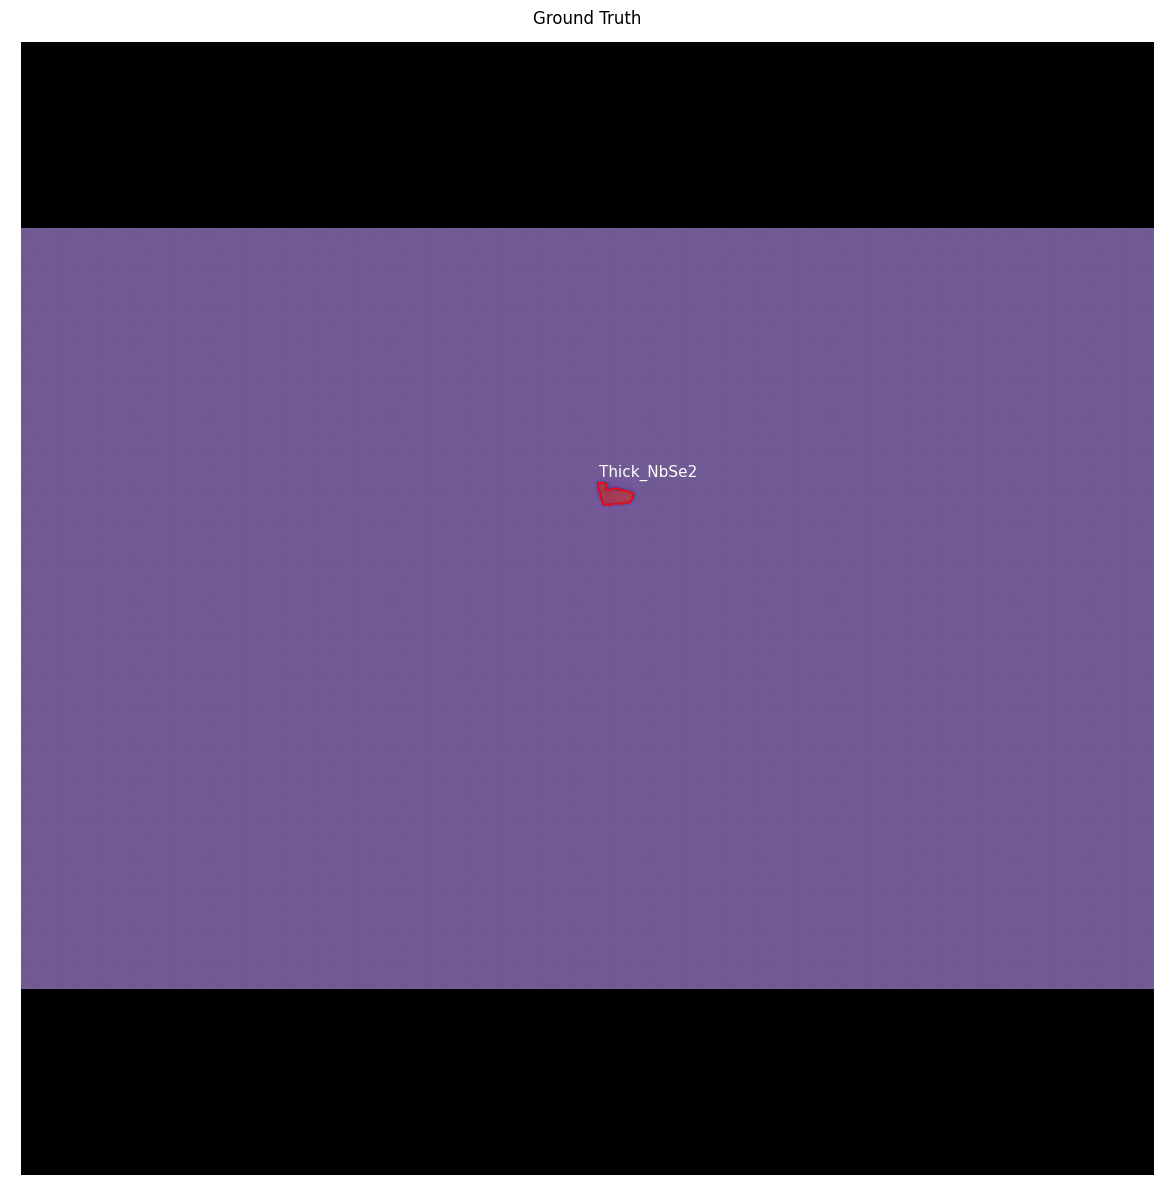

In [57]:
run_model.gt(dataset=split, iterate=True, show_bbox=False)